In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns


# Task # 8

# Find the probability of the occurrence of that event.

In [2]:
list1=['a' , 'b' , 'c' , 'd' , 'e']
final=[]
for i in list1:
    for j in list1:
        for k in list1:
            final.append(i+j+k)
            
len(final)

125

In [3]:
same_city=0
diff_city=0

for i in final:
    if(i[0] == i[1] or i[0] == i[2] or i[1]==i[2]):
        same_city+=1
    if(i[0] != i[1] and i[0] != i[2] and i[1]!=i[2]):
        diff_city+=1

In [4]:
prob1 = same_city/len(final)
prob2 = diff_city/len(final)
print(prob1)
print(prob2)

0.52
0.48


# Plot the probability distribution.

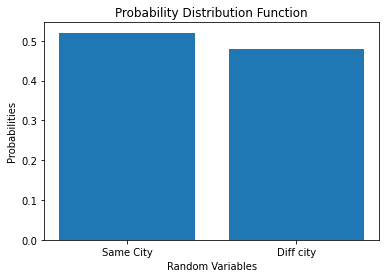

In [5]:
prob=[]
prob.append(prob1)
prob.append(prob2)
city = ['Same City' , 'Diff city']
plt.bar(city, prob)
plt.title('Probability Distribution Function')
plt.xlabel('Random Variables')
plt.ylabel('Probabilities')
plt.show()

# Is it a discrete distribution or a continuous one?

In [6]:
#This is Discrete Distributuion 

# Is it univariate or a multivariate problem?

In [7]:
#This is Multi-varient Problem

# Task - 1

# Apply univariate analysis on a feature in the given dataset

In [8]:
df = pd.read_csv ("Housing.csv")
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
mean1   = df['price'].mean()
std1    = df['price'].std()
median1 = df['price'].median()
z_score = stats.zscore(df['price'])

print("Mean: " , mean1)
print("Standard Deviation: " , std1)
print("Meadian: " , median1)
print ("Z- score: " , len(z_score))

Mean:  1058779.8678899081
Standard Deviation:  667148.2157118549
Meadian:  907584.0
Z- score:  545


# Task-2

# Use any classifier on the data

In [10]:
cols=['mainroad' , 'guestroom' , 'basement' , 'hotwaterheating' , 'airconditioning' , 'prefarea' , 'furnishingstatus']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,1,0,0,0,1,2,1,0
1,3123904,390488,734,532,4,4,4,1,0,0,0,1,3,0,0
2,1519896,379974,498,763,3,2,2,1,0,1,0,0,2,1,1
3,1152112,288028,382,754,4,2,2,1,0,1,0,1,3,1,0
4,887292,221823,503,441,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,1,0,1,0,0,2,0,2
541,483084,241542,497,486,3,1,1,0,0,0,0,0,0,0,1
542,364276,182138,374,487,2,1,1,1,0,0,0,0,0,0,2
543,734160,367080,570,644,3,1,1,0,0,0,0,0,0,0,0


In [11]:
X = df.drop('furnishingstatus' , axis = 1)
y = df['furnishingstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc  = accuracy_score(pred , y_test)
acc *= 100
acc

38.88888888888889

# Task-3

# Normalize the data using techniques learned in the class and feed the data to any classifier.

In [13]:
temp = df[["price","area","length","width"]]
scaler = StandardScaler()
Norm_temp = scaler.fit_transform(temp)
Norm_Data = pd.DataFrame(data = Norm_temp, columns=["price","area","length","width"])

for i in Norm_Data.columns:
     df[i] = Norm_Data[i]
        
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.610794,-0.433204,0.363412,-0.918937,4,2,3,1,0,0,0,1,2,1,0
1,3.098294,0.861228,1.314711,-0.088159,4,4,4,1,0,0,0,1,3,0,0
2,0.691810,0.768121,-0.277535,1.511089,3,2,2,1,0,1,0,0,2,1,1
3,0.140026,-0.046111,-1.060165,1.448781,4,2,2,1,0,1,0,1,3,1,0
4,-0.257282,-0.632391,-0.243801,-0.718166,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.021550,-0.923588,-0.466446,-0.988169,2,1,1,1,0,1,0,0,2,0,2
541,-0.863713,-0.457769,-0.284282,-0.406624,3,1,1,0,0,0,0,0,0,0,1
542,-1.041960,-0.983823,-1.114139,-0.399701,2,1,1,1,0,0,0,0,0,0,2
543,-0.487025,0.653937,0.208235,0.687234,3,1,1,0,0,0,0,0,0,0,0


# Task-4

# Evaluate your results, was normalization helpful? If yes then which one outperformed rest and why?

In [14]:
X = df.drop('furnishingstatus' , axis = 1)
y = df['furnishingstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc  = accuracy_score(pred , y_test)
acc *= 100
acc

40.0

In [16]:
# After Normalization Accuracy is increased by 2 percent. 

# Task-5

# Plot the area w.r.t to its independent variables in 2D and 3D

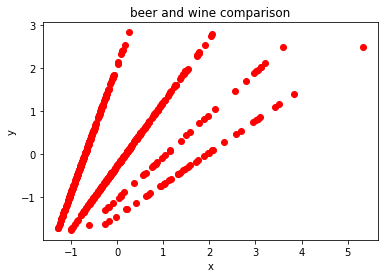

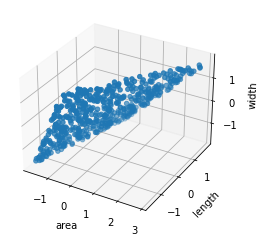

In [17]:
x=df['price']
y=df['area']
plt.scatter(x, y ,c="r")

plt.title('beer and wine comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#########################################

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["area"], df["length"], df["width"])
ax.set_xlabel('area')
ax.set_ylabel('length')
ax.set_zlabel('width')
# plt.legend(s.legend_elements()[0], list(set(df["target"])))
plt.show()

# Task-6

# Find the covariance &amp; correlation matrix of the normalized data

In [18]:
# co relation
df.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831


In [19]:
# co variance
df.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.001838,0.608944,0.436324,0.407959,0.248042,0.138921,0.642880,0.024441,0.014522,-0.082514,0.002937,0.104706,-0.047648,0.003506,-0.074008
area,0.608944,1.001838,0.697232,0.678671,0.025011,0.021512,-0.000418,-0.020330,-0.001504,-0.024718,0.000719,-0.007106,-0.107772,-0.019102,-0.019211
length,0.436324,0.697232,1.001838,-0.021085,0.052915,0.020387,0.007496,-0.016985,0.010577,-0.009078,-0.010882,0.042535,-0.026904,0.002017,-0.000014
width,0.407959,0.678671,-0.021085,1.001838,-0.000484,0.016169,0.005470,-0.008940,-0.015070,-0.024959,0.010648,-0.042216,-0.115345,-0.031917,-0.027373
bedrooms,0.248042,0.025011,0.052915,-0.000484,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,-0.069256
bathrooms,0.138921,0.021512,0.020387,0.016169,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,-0.054921
stories,0.642880,-0.000418,0.007496,0.005470,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.069135
mainroad,0.024441,-0.020330,-0.016985,-0.008940,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,-0.041601
guestroom,0.014522,-0.001504,0.010577,-0.015070,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,-0.034491
basement,-0.082514,-0.024718,-0.009078,-0.024959,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,-0.041025


# Task-7

# Find the correlation of length and area and plot it,.

In [20]:
temp_df = df[['area' , 'length']]
df_corr = temp_df.corr()
df_corr

,area,length
area,1.000000,0.695952
length,0.695952,1.000000


<AxesSubplot:>

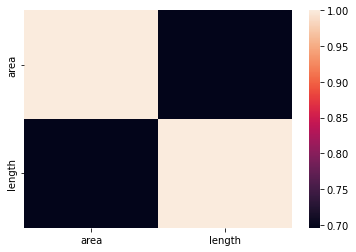

In [21]:
sns.heatmap(df_corr)